In [1]:
print('Begin')

Begin


In [2]:
'''For checking 3D space velocity against the grid values'''
'''Moved everything over from the XSEDE systemspec=pyfits.open('mcrx_200.fits')
CAMERA0=spec[25]
print(CAMERA0.header)
print(CAMERA0.header['CD1_1'])
Ang=[x[0]*10**(10) for x in spec[5].data]#'''

import sys 
sys.path.append('/usr/local/lib/python2.7/site-packages/ppxf')
print(sys.path)
import pyfits
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import WMAP9 as cosmo
from astropy.convolution import Gaussian1DKernel
from astropy.convolution import convolve
from ppxf import ppxf
import ppxf_util as util
from matplotlib.colors import LogNorm
import glob
from time import clock

import os

#spec=pyfits.open('q0.5_fg0.3_allrx10_sunruns/mcrx_200.fits')
#My\ Passport\ for\ Mac/
print(os.getcwd())
#Below is the older version (pre absorption lines):
#os.chdir(os.path.expanduser('/Volumes/My Passport for Mac/LAURA_Sims/q0.5_fg0.3_allrx10_sunruns/test_Smodel_hires_testlrange2'))
os.chdir(os.path.expanduser('/Volumes/My Passport for Mac/LAURA_Sims/q0.5_fg0.3_allrx10_sunruns/hirestest_kin/'))
print(os.getcwd())

['', '/Users/beckynevin/anaconda/lib/python36.zip', '/Users/beckynevin/anaconda/lib/python3.6', '/Users/beckynevin/anaconda/lib/python3.6/lib-dynload', '/Users/beckynevin/anaconda/lib/python3.6/site-packages', '/Users/beckynevin/anaconda/lib/python3.6/site-packages/Sphinx-1.5.1-py3.6.egg', '/Users/beckynevin/anaconda/lib/python3.6/site-packages/aeosa', '/Users/beckynevin/anaconda/lib/python3.6/site-packages/setuptools-27.2.0-py3.6.egg', '/Users/beckynevin/anaconda/lib/python3.6/site-packages/IPython/extensions', '/Users/beckynevin/.ipython', '/usr/local/lib/python2.7/site-packages', '/usr/local/lib/python2.7/site-packages/ppxf']
/Volumes/My Passport for Mac/LAURA_Sims
/Volumes/My Passport for Mac/LAURA_Sims/q0.5_fg0.3_allrx10_sunruns/hirestest_kin


In [3]:
spec=pyfits.open('mcrx_200.fits')
print(spec[25].header['CD1_1'])

num=15
print(spec[num].header['CAMPOSX'])#spec[10] and spec[11] are camera0-parameters and camera1-
print(spec[num].header['CAMPOSY'])
print(spec[num].header['CAMPOSZ'])

for i in range(38):
    j=i+1
    print(j,spec[j].header['EXTNAME'])




0.166666666666667
-4103.25903324145
7107.05312219014
-5714.28571428571
1 SCATTERING_LAMBDAS
2 BHMODEL
3 GADGET
4 GRIDSTRUCTURE
5 LAMBDA
6 MAKEGRID
7 SFRHIST
8 STELLARMODEL
9 MCRX
10 CAMERA0-PARAMETERS
11 CAMERA1-PARAMETERS
12 CAMERA2-PARAMETERS
13 CAMERA3-PARAMETERS
14 CAMERA4-PARAMETERS
15 CAMERA5-PARAMETERS
16 CAMERA6-PARAMETERS
17 RANDOM_STATE
18 CAMERA0-NONSCATTER
19 CAMERA1-NONSCATTER
20 CAMERA2-NONSCATTER
21 CAMERA3-NONSCATTER
22 CAMERA4-NONSCATTER
23 CAMERA5-NONSCATTER
24 CAMERA6-NONSCATTER
25 CAMERA0
26 CAMERA1
27 CAMERA2
28 CAMERA3
29 CAMERA4
30 CAMERA5
31 CAMERA6
32 CAMERA0-AUX
33 CAMERA1-AUX
34 CAMERA2-AUX
35 CAMERA3-AUX
36 CAMERA4-AUX
37 CAMERA5-AUX
38 CAMERA6-AUX


11781
0.166666666666667
(11781,)


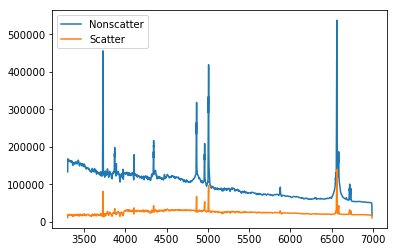

In [4]:
print(len(spec[18].data))
CAMERA0=spec[25]
print(spec[25].header['CD1_1'])
Ang=[x[0]*10**(10) for x in spec[5].data]
print(np.shape(Ang))
plt.clf()
plt.plot(Ang, np.sum(spec[18].data, axis=(1,2)), label='Nonscatter')
plt.plot(Ang, np.sum(spec[25].data, axis=(1,2)), label='Scatter')
plt.legend()
plt.show()

What is the resolution?
0.31319451531 Angs sigma
max resolution 0.445294906098


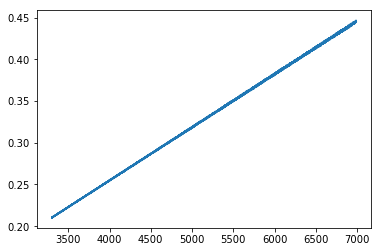

mean res 2.4581333488


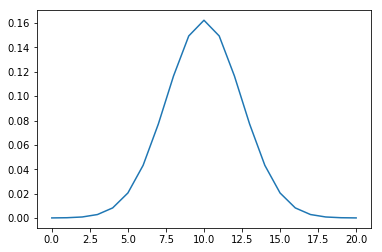

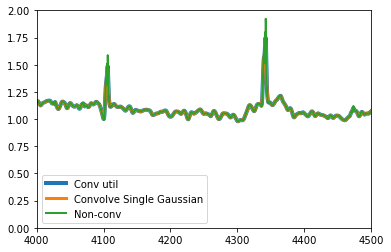

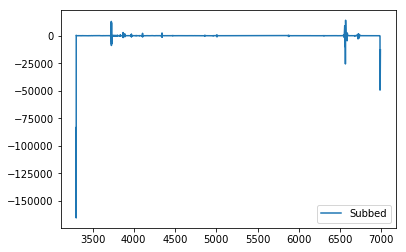

In [48]:
'''Check convolution'''

ext=18
print('What is the resolution?')
print((Ang[-1]-Ang[0])/len(Ang), 'Angs sigma')


res=[x/2000 for x in Ang]
res_element=[]
Ang_del=[]
for i in range(len(Ang)-1):
    res_element.append(Ang[i+1]-Ang[i])
    Ang_del.append(Ang[i])
print('max resolution', res_element[-1])
plt.clf()
plt.plot(Ang_del, res_element)
plt.show()
res_gauss=np.mean(res)
print('mean res', res_gauss)

res=np.array(res)
#test=Gaussian1DKernel(np.sum(spec[18].data, axis=(1,2)), res)
test = util.gaussian_filter1d(np.sum(spec[ext].data, axis=(1,2)), res)
g = Gaussian1DKernel(res_gauss)

plt.plot(g)
plt.show()

# Convolve data
z = convolve(np.sum(spec[ext].data, axis=(1,2)), g)

plt.plot(Ang, test/np.median(test), label='Conv util', lw=4)
plt.plot(Ang, z/np.median(z), label='Convolve Single Gaussian', lw=3)
plt.plot(Ang, np.sum(spec[ext].data, axis=(1,2))/np.median(np.sum(spec[ext].data, axis=(1,2))), label='Non-conv', lw=2)

plt.legend()
#plt.xlim([5850,5900])
plt.xlim([4000,4500])
plt.ylim([0,2])
plt.show()

diff=test-z
plt.plot(Ang, diff, label='Subbed')
#plt.plot(test, label='Conv')
plt.legend()
#plt.xlim([5200,5600])
#plt.ylim([-0.02,0.02])

plt.show()


0.0 0.0 10000.0


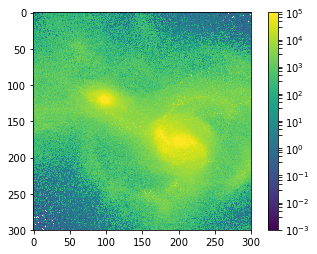

~~~~~~~
9583.1484749991 0.0 2857.14285714286


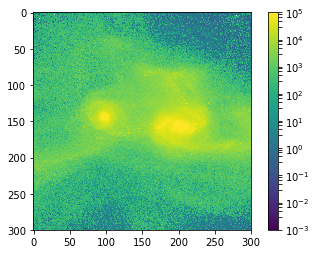

~~~~~~~
-4791.57423749955 8299.25002758732 2857.14285714286


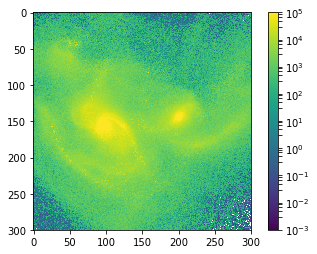

~~~~~~~
-4791.57423749955 -8299.25002758732 2857.14285714286


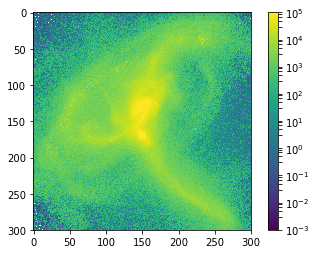

~~~~~~~
8206.5180664829 0.0 -5714.28571428571


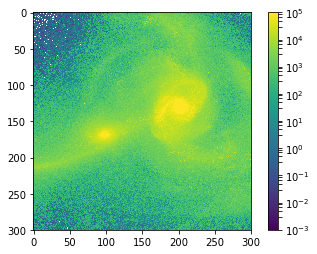

~~~~~~~
-4103.25903324145 7107.05312219014 -5714.28571428571


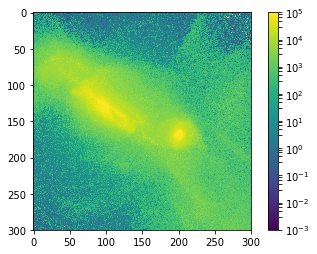

~~~~~~~
-4103.25903324145 -7107.05312219014 -5714.28571428571


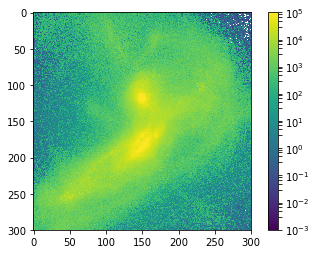

"fig = plt.figure()\nax1 = fig.add_subplot(111, aspect='equal')\n#\nim1 = ax1.imshow((np.sum(y, axis=0)),norm=LogNorm(vmin=0.001, vmax=10**5), alpha=0.9, cmap='Greys')\nplt.show()"

In [9]:


Ang=[x[0]*10**(10) for x in spec[5].data]#
num=10
print(spec[num].header['CAMPOSX'],spec[num].header['CAMPOSY'],spec[num].header['CAMPOSZ'])#spec[10] and spec[11] are camera0-parameters and camera1-
CAMERA0=spec[25]#start at 25 go up
y=extract_spec_x_cut(0,300,0,300,300)

print('~~~~~~~')
num=11
print(spec[num].header['CAMPOSX'],spec[num].header['CAMPOSY'],spec[num].header['CAMPOSZ'])#spec[10] and spec[11] are camera0-parameters and camera1-

CAMERA0=spec[26]#start at 25 go up
y=extract_spec_x_cut(0,300,0,300,300)

print('~~~~~~~')
num=12
print(spec[num].header['CAMPOSX'],spec[num].header['CAMPOSY'],spec[num].header['CAMPOSZ'])#spec[10] and spec[11] are camera0-parameters and camera1-


CAMERA0=spec[27]#start at 25 go up
y=extract_spec_x_cut(0,300,0,300,300)

print('~~~~~~~')
num=13
print(spec[num].header['CAMPOSX'],spec[num].header['CAMPOSY'],spec[num].header['CAMPOSZ'])#spec[10] and spec[11] are camera0-parameters and camera1-

CAMERA0=spec[28]#start at 25 go up
y=extract_spec_x_cut(0,300,0,300,300)

print('~~~~~~~')
num=14
print(spec[num].header['CAMPOSX'],spec[num].header['CAMPOSY'],spec[num].header['CAMPOSZ'])#spec[10] and spec[11] are camera0-parameters and camera1-

CAMERA0=spec[29]#start at 25 go up
y=extract_spec_x_cut(0,300,0,300,300)

print('~~~~~~~')
num=15
print(spec[num].header['CAMPOSX'],spec[num].header['CAMPOSY'],spec[num].header['CAMPOSZ'])#spec[10] and spec[11] are camera0-parameters and camera1-

CAMERA0=spec[30]#start at 25 go up
y=extract_spec_x_cut(0,300,0,300,300)

print('~~~~~~~')
num=16
print(spec[num].header['CAMPOSX'],spec[num].header['CAMPOSY'],spec[num].header['CAMPOSZ'])#spec[10] and spec[11] are camera0-parameters and camera1-

CAMERA0=spec[31]#start at 25 go up
y=extract_spec_x_cut(0,300,0,300,300)
'''fig = plt.figure()
ax1 = fig.add_subplot(111, aspect='equal')
#
im1 = ax1.imshow((np.sum(y, axis=0)),norm=LogNorm(vmin=0.001, vmax=10**5), alpha=0.9, cmap='Greys')
plt.show()'''

In [5]:
import pyfits
grid=pyfits.open('grid_200.fits')
#print(grid['PARTICLEDATA'].header)
for i in range(10):
    j=i+1
    print(j,grid[j].header['EXTNAME'])
    
print(np.shape(grid['GRIDDATA'].data))
print(np.shape(grid['PARTICLEDATA'].data))

print(grid['PARTICLEDATA'].header)

parts=grid['PARTICLEDATA'].data

print(np.shape(parts['L_lambda']))#this is log(L_lambda) so to get back you need to do 10**()

#Ang=[x[0]*10**(10) for x in spec[5].data]

'''logified_W=10**parts['L_lambda']
print(np.shape(logified_W))

plt.plot(Ang, 10**parts['L_lambda'][0,:])
plt.xlabel('Ang')
plt.ylabel('Flux [W]')
plt.show()
print(np.shape(parts['L_bol']))'''

'''Find the index where A is 5635 A'''
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]
'''logified_W=10**parts['L_lambda']
W_5653=logified_W.tolist().index(find_nearest(np.array(Ang),  5653))
print(np.shape(W_5653))'''


1 MAKEGRID
2 GRIDSTRUCTURE
3 GRIDDATA
4 SFRHIST
5 GADGET
6 PARTICLEDATA
7 INTEGRATED_QUANTITIES
8 STELLARMODEL
9 LAMBDA
10 BHMODEL
(1571200,)
(2415221,)
XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / 8-bit bytes                                    NAXIS   =                    2 / 2-dimensional binary table                     NAXIS1  =                47236 / width of table in bytes                        NAXIS2  =              2415221 / number of rows in table                        PCOUNT  =                    0 / size of special data area                      GCOUNT  =                    1 / one data group (required keyword)              TFIELDS =                   12 / number of fields in each row                   EXTNAME = 'PARTICLEDATA'       / name of this binary table extension            TTYPE1  = 'ID      '           / label for field                                TFORM1  = 'J       '           / format of fiel

"logified_W=10**parts['L_lambda']\nW_5653=logified_W.tolist().index(find_nearest(np.array(Ang),  5653))\nprint(np.shape(W_5653))"

In [6]:
import math
math.sin(math.radians(16.6015))

0.2857134561333977



parts=grid['PARTICLEDATA'].data

print('velocity',parts['velocity'][10:])#kpc/yr
print('position',parts['position'][10:])#kpc
plt.clf()

kpc_arcmin=cosmo.kpc_proper_per_arcmin(0.03)#insert the redshift to get the kpc/arcmin scaling

kpc_arcsec=(kpc_arcmin.value/60)#

'''from numpy import cross, eye, dot
from scipy.linalg import expm3, norm

def M(axis, theta):
    return expm3(cross(eye(3), axis/norm(axis)*theta))

v, axis, theta = [3,5,0], [4,4,1], 1.2
M0 = M(axis, theta)

print(dot(M0,v))'''

xs_before=[]
ys_before=[]
vel=[]
L_bol=[]
for i in range(len(parts['velocity'])):#len(parts['velocity'])parts['velocity']
    if np.sum(parts['L_lambda'][i]) > 450000:
        xs_before.append(parts['position'][i][0]/math.cos(math.radians(16.6015)))#now in arcsec
        ys_before.append(parts['position'][i][1])#now in arcsec
        
       
        '''also might have to do a rotation in x and y and z to get everything to work out here'''
        
        L_bol.append(np.sum(parts['L_lambda'][i]))
        vel_comps=(parts['velocity'][i][2]/math.sin(math.radians(16.6015))+parts['velocity'][i][0]/math.cos(math.radians(16.6015)))
        vel.append(vel_comps*(3.086e16/3.154e7))
plt.scatter(xs_before,ys_before,c=vel, s=2)
plt.colorbar()
plt.show()

plt.scatter(xs_before,ys_before,c=L_bol, s=2)
plt.colorbar()
plt.show()




2415221


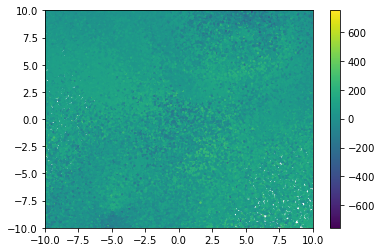

In [51]:
grid=pyfits.open('grid_200.fits')
parts=grid['PARTICLEDATA'].data

kpc_arcmin=cosmo.kpc_proper_per_arcmin(0.03)#insert the redshift to get the kpc/arcmin scaling

kpc_arcsec=(kpc_arcmin.value/60)#

the_index=np.array(Ang).tolist().index(find_nearest(np.array(Ang),  5653))


xs_before=[]
ys_before=[]
vel=[]
weighted=[]
L_bol=[]
W_5683=[]
weighted_L=[]

print(len(parts['velocity']))

for i in range(len(parts['velocity'])):#len(parts['velocity'])parts['velocity']
    #if np.sum(parts['L_lambda'][i]) > 450000:
    xs_before.append(parts['position'][i][0])#now in arcsec
    ys_before.append(parts['position'][i][1])#now in arcsec
    #L_bol.append(np.sum(parts['L_lambda'][i]))
    logified_W=parts['L_lambda'][i]
    W_5683.append(logified_W[the_index])
    
    weighted_L.append(logified_W[the_index]*parts['velocity'][i][2]*(3.086e16/3.154e7))
    vel.append(parts['velocity'][i][2]*(3.086e16/3.154e7))

plt.clf()
plt.scatter(xs_before,ys_before,c=vel, s=2)
plt.colorbar()
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.show()







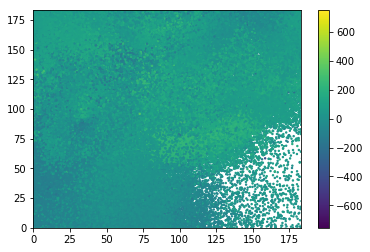

In [52]:
'''Now we need to transpose the x and y into pixels so we can rebin according to that'''
pixelscale=spec[25].header['CD1_1']
xs_ready_rebin=[i/pixelscale+150-87 for i in xs_before]
ys_ready_rebin=[i/pixelscale+150-8 for i in ys_before]
#now in terms of pixels with 0-183, so centerd on 91.5 for each dimension
plt.scatter(xs_ready_rebin, ys_ready_rebin, c=vel, s=2)
plt.colorbar()
plt.xlim([0,183])
plt.ylim([0,183])
plt.show()



In [53]:
grid_x_part, grid_y_part = np.mgrid[0:182:183j, 0:182:183j]

xs_new=[(x)/pixelscale+150-87 for x in xs_before]
ys_new=[-(x)/pixelscale+(150-8) for x in ys_before]

points_part = [xs_new, ys_new]#np.concatenate((xs_ready_rebin, ys_ready_rebin))#[xs_ready_rebin, ys_ready_rebin]
points_part = np.array(points_part).transpose()

'''Maybe use ndimage first to rebin'''
from scipy.interpolate import griddata
from scipy import ndimage
'''print(len(vel))
print(len(weighted))
vel_w=ndimage.convolve(a mode='constant', cval=0.0)'''

points = np.random.rand(1000, 2)
print(points)

def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2
values = func(points[:,0], points[:,1])
print(len(values))
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]
print(grid_x)
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')

print(type(points), type(values), type(grid_x))

print(type(points_part), type(vel), type(grid_x_part))
grid_z0 = griddata(points_part, np.array(weighted_L), (grid_x_part, grid_y_part), method='nearest')
#nearest, linear, cubic


[[ 0.13295974  0.2471513 ]
 [ 0.19602165  0.09469252]
 [ 0.17648781  0.60887689]
 ..., 
 [ 0.29565681  0.89788739]
 [ 0.89308937  0.22423955]
 [ 0.72676645  0.22520878]]
1000
[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.01010101  0.01010101  0.01010101 ...,  0.01010101  0.01010101
   0.01010101]
 [ 0.02020202  0.02020202  0.02020202 ...,  0.02020202  0.02020202
   0.02020202]
 ..., 
 [ 0.97979798  0.97979798  0.97979798 ...,  0.97979798  0.97979798
   0.97979798]
 [ 0.98989899  0.98989899  0.98989899 ...,  0.98989899  0.98989899
   0.98989899]
 [ 1.          1.          1.         ...,  1.          1.          1.        ]]
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'list'> <class 'numpy.ndarray'>


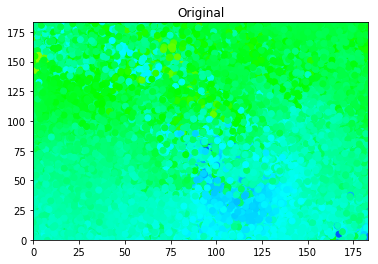

In [54]:
plt.clf()
#plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
plt.scatter(points_part[:,0], points_part[:,1], c=weighted_L, cmap='gist_rainbow_r')
plt.title('Original')
plt.xlim([0,183])
plt.ylim([0,183])
plt.show()
plt.imshow(grid_z0.T, extent=(0,183,0,183), origin='lower', cmap='gist_rainbow_r')
plt.title('Linear')
plt.colorbar()
plt.savefig('../../../MaNGA_papers/Paper_I/lin_interp_grid_all_weighted_L.pdf')

In [136]:
'''Now, trying to use scipy.stats.binned_statistic_2d to weight by luminosity*v and one by luminosity and divide'''


from scipy import stats
print(type(points_part[:,0]), type(np.array(vel)), type(grid_x_part))
print(len(points_part[:,0]), len(np.array(vel)), len(grid_x_part))
print(points_part)

length=91
f=1


stat=stats.binned_statistic_2d(points_part[:,0],points_part[:,1], weighted_L, 'sum', bins=[length*f,length*f], range=[[92/2,3*(92/2)],[92/2,3*(92/2)]])
stat_v=stats.binned_statistic_2d(points_part[:,0],points_part[:,1], W_5683, 'sum', bins=[length*f,length*f], range=[[92/2,3*(92/2)],[92/2,3*(92/2)]])
vel_dist=stat[0]/stat_v[0]

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
2415221 2415221 183
[[  33.90852917  193.45378668]
 [  29.23183567  176.96616918]
 [  38.94340641  193.65608552]
 ..., 
 [  92.60024469   91.093064  ]
 [  33.4035995   193.46045695]
 [  92.53804196   90.63534937]]


/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in true_divide


<class 'numpy.ndarray'>


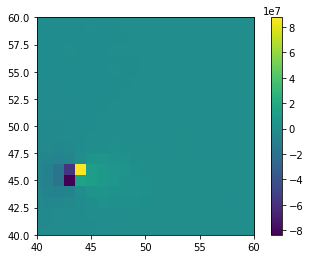

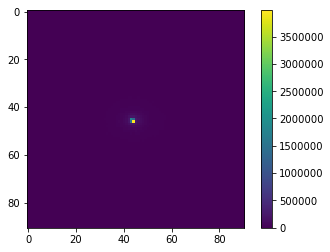

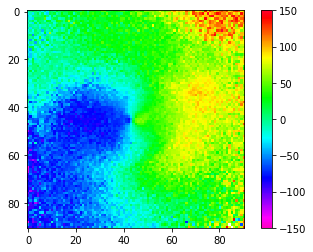

In [137]:
print(type(stat[0]))

plt.imshow(stat[0])
plt.colorbar()
plt.xlim([40,60])
plt.ylim([40,60])
plt.show()

plt.imshow(stat_v[0])
plt.colorbar()
plt.show()
plt.imshow(vel_dist, vmin=-150, vmax=150,cmap='gist_rainbow_r')
plt.colorbar()
plt.show()



In [141]:
print(np.shape(vel_dist), np.shape(stat_v[1]), np.shape(stat_v[2]))
print(np.shape(vel_dist.flatten()))
x = np.arange(vel_dist.shape[0]).reshape(vel_dist.shape[0],1).repeat(vel_dist.shape[1],axis=1)
print(len(x))
size=183

os.chdir(os.path.expanduser('/Volumes/My Passport for Mac/LAURA_Sims/q0.5_fg0.3_allrx10_sunruns/hirestest_kin/Figs')) # path to the simulated images
file2=open('kinemetry_input_append_54_0_grid.txt','w')
#file2.write('#'+'\t'+'XBIN'+'\t'+'YBIN'+'\t'+'VEL'+'\t'+'ER_VEL'+'\t'+'SIG'+'\t'+'ER_SIG'+'\n')
counter=1
for i in range(np.shape(vel_dist)[0]):
    for j in range(np.shape(vel_dist)[1]):
        if str(vel_dist[i,j])== 'nan':
            continue
        else:
            file2.write(str(i)+'\t'+str(np.shape(vel_dist)[1]-j)+'\t')
            file2.write(str(round(vel_dist[i,j],2))+'\t'+str(round(abs(vel_dist[i,j]/10),2))+'\t'+str(round(vel_dist[i,j],2))+'\t'+str(round(vel_dist[i,j],2))+'\n')
            #print(counter, i, j, masked[i,j])
            counter +=1
                
file2.close()    


        
        
'''os.chdir(os.path.expanduser('~/Documents/LAURA_Sims/'))

    file2=open('kinemetry_input_append_54_0_grid.txt','w')
    file2.write('#'+'\t'+'XBIN'+'\t'+'YBIN'+'\t'+'VEL'+'\t'+'ER_VEL'+'\t'+'SIG'+'\t'+'ER_SIG'+'\n')
    
    
    counter=1
    for i in range(149):
        for j in range(149):
            if str(masked[i,j])== '--':
                continue
            else:
                file2.write(str(counter)+'\t'+str(i-middle_x)+'\t'+str(j-middle_y)+'\t')
                file2.write(str(round(masked[i,j],2))+'\t'+str(round(masked_e[i,j],2))+'\t'+str(round(masked_d[i,j],2))+'\t'+str(round(masked_d_e[i,j],2))+'\n')
                #print(counter, i, j, masked[i,j])
                counter +=1
                
    file2.close()'''

(91, 91) (92,) (92,)
(8281,)
91


"os.chdir(os.path.expanduser('~/Documents/LAURA_Sims/'))\n\n    file2=open('kinemetry_input_append_54_0_grid.txt','w')\n    file2.write('#'+'\t'+'XBIN'+'\t'+'YBIN'+'\t'+'VEL'+'\t'+'ER_VEL'+'\t'+'SIG'+'\t'+'ER_SIG'+'\n')\n    \n    \n    counter=1\n    for i in range(149):\n        for j in range(149):\n            if str(masked[i,j])== '--':\n                continue\n            else:\n                file2.write(str(counter)+'\t'+str(i-middle_x)+'\t'+str(j-middle_y)+'\t')\n                file2.write(str(round(masked[i,j],2))+'\t'+str(round(masked_e[i,j],2))+'\t'+str(round(masked_d[i,j],2))+'\t'+str(round(masked_d_e[i,j],2))+'\n')\n                #print(counter, i, j, masked[i,j])\n                counter +=1\n                \n    file2.close()"

In [ ]:
print('done')

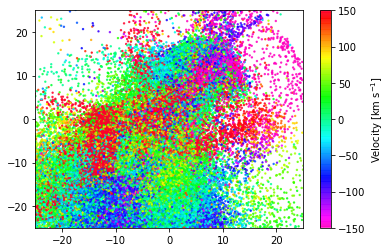

kpc per arcsec 0.6067249692472986
pixelsize in arcsec 0.27468788734170274


In [70]:
CAMERA0=spec[25]

plt.clf()
plt.scatter(xs_before,ys_before,c=vel, vmin=-150, vmax=150,s=2, cmap='gist_rainbow_r', alpha=0.75)

plt.colorbar(label=r'Velocity [km s$^{-1}$]')
plt.xlim([-25,25])
plt.ylim([-25,25])
plt.show()

pixelscale=0.166666666666667#kpc/pixel
plt.clf()
fig=plt.figure()
ax1=fig.add_subplot(111)
im1=ax1.imshow(np.rot90(np.sum(CAMERA0.data,axis=0)), norm=LogNorm(vmin=1, vmax=1e7), cmap='Greys_r')
xs_new=[(x)/pixelscale+150 for x in xs_before]
ys_new=[-(x)/pixelscale+150 for x in ys_before]
im2=ax1.scatter(xs_new,ys_new,c=vel, vmin=-150, vmax=150,s=2, cmap='gist_rainbow_r', alpha=0.75)

cbar1=plt.colorbar(im1, label=r'Broadband Flux Density [W/m$^{2}$/sr]')
cbar2=plt.colorbar(im2)

cbar2.set_label(r'Velocity [km s$^{-1}$]', labelpad=-2)
length=300
yticks=[1 ,length/2    ,length]

ylabels=[round((x-length/2)*pixelscale,1) for x in yticks]

'''ax1.set_yticks(yticks)
ax1.set_yticklabels(ylabels)
ax1.set_xticks(yticks)
ax1.set_xticklabels(ylabels)
ax1.set_ylabel(r'Spatial Position [$^{\prime\prime}$]')
ax1.set_xlabel(r'Spatial Position [$^{\prime\prime}$]')'''
plt.xlim([0,300])
plt.ylim([0,300])
plt.tight_layout()
plt.savefig('../../../MaNGA_papers/Paper_I/overlap_all_17.pdf')

'''Now, doing the same thing but shifted to the position of our new window'''



pixelscale=0.166666666666667#kpc/pix
plt.clf()
fig=plt.figure()
ax1=fig.add_subplot(111)
im1=ax1.imshow(np.rot90(np.sum(CAMERA0.data[:,87:270,109:292],axis=0)), norm=LogNorm(vmin=1, vmax=1e7), cmap='Greys_r')
xs_new=[(x)/pixelscale+150-87 for x in xs_before]
ys_new=[-(x)/pixelscale+(150-8) for x in ys_before]
im2=ax1.scatter(xs_new,ys_new,c=vel, vmin=-150, vmax=150,s=2, cmap='gist_rainbow_r', alpha=0.75)

cbar1=plt.colorbar(im1, label=r'Broadband Flux Density [W/m$^{2}$/sr]')
cbar2=plt.colorbar(im2)

cbar2.set_label(r'Velocity [km s$^{-1}$]', labelpad=-2)
length=183
yticks=[1 ,length/2    ,length]

ylabels=[round((x-length/2)*pixelscale,1) for x in yticks]
kpc_arcmin=cosmo.kpc_proper_per_arcmin(0.03)#insert the redshift  

#MaNGA's pixels are 0.5 arcseconds

pixelscale=0.16666

pixsize = pixelscale / (kpc_arcmin.value/60)# kpc/ kpc/arcsec
print('kpc per arcsec', (kpc_arcmin.value/60))
print('pixelsize in arcsec', pixsize)

ylabels=[round((x-length/2)*pixsize*int(183/length),1) for x in yticks]
    
'''ax1.set_yticks(yticks)
ax1.set_yticklabels(ylabels)
ax1.set_xticks(yticks)
ax1.set_xticklabels(ylabels)
ax1.set_ylabel(r'Spatial Position [$^{\prime\prime}$]')
ax1.set_xlabel(r'Spatial Position [$^{\prime\prime}$]')'''
plt.xlim([0,183])
plt.ylim([0,183])
plt.tight_layout()
plt.savefig('../../../MaNGA_papers/Paper_I/overlap_window_47.png')

xcen 178.671676661 ycen 200.420350362
132 224 154 246


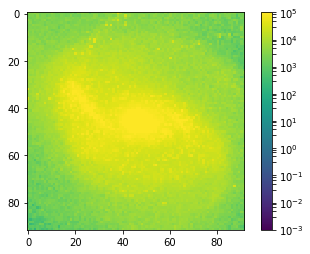

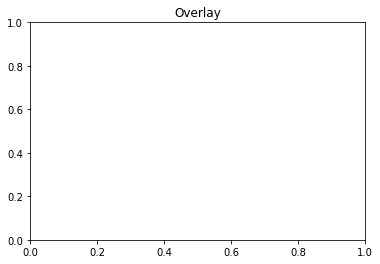

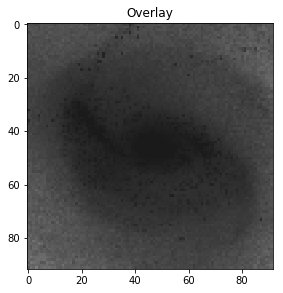

ValueError: operands could not be broadcast together with shapes (11781,92,92) (11781,46,46) (11781,92,92) 

In [86]:
#plotting_maps_janky('Figs/kinemetry_input_append_10.txt',60)#was 7
view=0
if view==0:
    CAMERA0=spec[25]
    x_cen=178.671676661
    y_cen=200.420350362
if view==2:
    CAMERA0=spec[27]
    #144.1, 97.7
    x_cen=155.367726938
    y_cen= 97.9338219573
if view==3:
    CAMERA0=spec[28]
    x_cen=130.224791408
    y_cen=148.524407105
if view==4:
    CAMERA0=spec[29]
    x_cen=130.899169371
    y_cen=200.407107373
if view==5:
    CAMERA0=spec[30]
    x_cen=130.565365471
    y_cen=97.5278480735
if view==6:
    CAMERA0=spec[31]
    x_cen=182.592183406
    y_cen=149.860108047
print('xcen', x_cen, 'ycen', y_cen)
size=92
plt.clf()
plotting_maps_janky('Figs/kinemetry_input_append_54_'+str(view)+'.txt', size, 'yes', int(x_cen-size/2),
                    int(x_cen+size/2),int(y_cen-size/2),int(y_cen+size/2) , view)#was 53, 152,205,174,227

In [ ]:
def plotting_maps_janky(file_path, size, convolve, x1, x2, y1, y2, view):
    #First, break down the kinemetry file
    print(x1,x2,y1,y2)
    
    with open(file_path, 'r') as f:
        data = f.readlines()
        #print(data)
        stel_vel=np.zeros((size,size))
        stel_vel_e=np.zeros((size,size))
        stel_disp=np.zeros((size,size))
        stel_disp_e=np.zeros((size,size))
        
        
        for line in data:
            words = line.split()
 
            if (words[0]) != 'Beginning':
 
             
                xs=int(round(float(words[0]),0))
                ys=int(round(float(words[1]),0))
            
                '''if float(words[2]) != 0 and float(words[4]) != 0:
            
                    if abs(float(words[3])/float(words[2])) < 10 and abs(float(words[5])/float(words[4])) < 10:
                     '''   
                if float(words[2]) !=0:
                    
                    #if float(words[3]) > 0.1:#abs(float(words[3])/float(words[2])) < 0.2:
                    stel_vel[xs,ys] = float(words[2])
                    stel_vel_e[xs,ys] = float(words[3])

                    stel_disp[xs,ys] = float(words[4])
                    stel_disp_e[xs,ys] = float(words[5])
                    '''else:
                        stel_vel[xs,ys] = 0
                        stel_vel_e[xs,ys] = 0

                        stel_disp[xs,ys] = 0
                        stel_disp_e[xs,ys] = 0'''
                else:
                    stel_vel[xs,ys] = 0
                    stel_vel_e[xs,ys] = 0

                    stel_disp[xs,ys] = 0
                    stel_disp_e[xs,ys] = 0
                    
                
                
                
                

    #masked_stel_vel=np.ma.masked_where(abs(stel_vel_e/stel_vel) > 1, stel_vel)
    masked_stel_vel = np.ma.masked_where(stel_vel == 0, stel_vel)
    #masked_stel_vel = np.ma.masked_where(abs(stel_vel_e/stel_vel) > 0.01, masked_stel_vel)
    #masked_stel_vel = np.ma.masked_where(abs(stel_disp_e/stel_disp) > 0.1, masked_stel_vel)
    masked_stel_vel_e = np.ma.masked_where(stel_vel==0, stel_vel_e)
    
    #masked_disp = np.ma.masked_where(abs(stel_disp_e/stel_disp) > 1, stel_disp)
    masked_disp = np.ma.masked_where(stel_disp ==0, stel_disp)
    masked_disp_e = np.ma.masked_where(stel_disp==0, stel_disp_e)
    '''plt.imshow(np.fliplr(np.flipud(masked_stel_vel)), vmin=-150, vmax=150)
    plt.colorbar()
    plt.show()
    plt.clf()
    '''
    '''What about making it look pretty with pixelsize?'''
    
    kpc_arcmin=cosmo.kpc_proper_per_arcmin(0.03)#insert the redshift  
    #MaNGA's pixels are 0.5 arcseconds

    pixelscale=0.16666
    
    pixsize = pixelscale / (kpc_arcmin.value/60)
    
    '''Make labels'''
    '''fig = plt.figure()
    ax1 = fig.add_subplot(211, aspect='equal')
    ax1.set_title('Stellar Velocity')
    
    im1=ax1.imshow(((masked_stel_vel)), vmin=-150, vmax=150, cmap='gist_rainbow_r')
    
    yticks=[0,75,150,150+75,300]
    yticks=[0 ,size/2    ,size]
    ylabels=[round((x-size/2)*pixsize,1) for x in yticks]
    #ax1.set_yticks(yticks)
    #ax1.set_yticklabels(ylabels)
    #ax1.set_xticks(yticks)
    #ax1.set_xticklabels(ylabels)
    #ax1.set_ylabel(r'Spatial Position [$^{\prime \prime}$]')
    #ax1.set_xlabel(r'Spatial Position [$^{\prime \prime}$]')
    plt.colorbar(im1, orientation='vertical')
    
    ax2 = fig.add_subplot(221, aspect='equal')
    ax2.set_title('Stellar Dispersion')
    
    im2=ax2.imshow(((masked_disp)), vmin=0, vmax=300, cmap='gist_rainbow_r')
    
    yticks=[0,75,150,150+75,300]
    yticks=[0 ,size/2    ,size]
    ylabels=[round((x-size/2)*pixsize,1) for x in yticks]
    #ax1.set_yticks(yticks)
    #ax1.set_yticklabels(ylabels)
    #ax1.set_xticks(yticks)
    #ax1.set_xticklabels(ylabels)
    #ax1.set_ylabel(r'Spatial Position [$^{\prime \prime}$]')
    #ax1.set_xlabel(r'Spatial Position [$^{\prime \prime}$]')
    plt.colorbar(im2, orientation='vertical')
    fig.tight_layout()
    plt.show()'''
    
    
    y=extract_spec_x_cut(x1,x2,y1,y2 ,size)
    
    plt.clf()
    
    plt.title('Overlay')
    
    fig = plt.figure()
    ax1 = fig.add_subplot(111, aspect='equal')
    #
    im1 = ax1.imshow((np.sum(y, axis=0)),norm=LogNorm(vmin=0.001, vmax=10**5), alpha=0.9, cmap='Greys')
    #im2 = ax1.imshow(((masked_stel_vel)), vmin=-150, vmax=150, cmap='gist_rainbow_r')
    #plt.colorbar(im2, orientation='vertical')
    fig.tight_layout()
    plt.title('Overlay')
    
    plt.show()
    
    
    x = np.arange(0, size, 1)
    yz = np.arange(0, size, 1)
    
    X, Y = np.meshgrid(x, yz)
    
    
    '''if convolved do the following:'''
    if convolve=='yes':
        factor=2
        input_data=CAMERA0.data[:,x1:x2,y1:y2]
        data_new = np.zeros((len(input_data[:,0,0]), size, size))

        data_new += input_data[:, ::factor, ::factor] + input_data[:, 1::factor, ::factor] + input_data[:, ::factor, 1::factor] + input_data[:, 1::factor, 1::factor]# Take (0,0)       
    #np.rot90(np.sum(CAMERA0.data[:,87:270,109:292],axis=0)
    
    
        Z = np.array(np.rot90(np.sum(data_new,axis=0)))
    else:
        print(np.shape(CAMERA0.data[:,x1:x2,y1:y2]))
        Z = np.array(np.rot90(np.sum(CAMERA0.data[:,x1:x2,y1:y2],axis=0)))
    #there was a np.rot90 for the contours here
    
    
    
    levels = np.arange(10**4, 10**5.5, 10**5)
    
    fig = plt.figure()
    ax1 = fig.add_subplot(111, aspect='equal')
    im1 = ax1.contour(X, Y, Z, levels, colors='black', linewidths=1)
    
    
    im2 = ax1.imshow(np.rot90(np.fliplr(vel_dist)),vmin=-150, vmax=150,  cmap='gist_rainbow_r', alpha=0.75)
    #vel_dist, np.rot90(masked_stel_vel)
    plt.colorbar(im2, orientation='vertical', label='Stellar Velocity')
    #fig.tight_layout()
    yticks=[0 ,size/2    ,size]
    print(pixsize) 
    ylabels=[round((x-size/2)*pixsize,1) for x in yticks]
    ax1.set_yticks(yticks)
    ax1.set_yticklabels(ylabels)
    ax1.set_xticks(yticks)
    ax1.set_xticklabels(ylabels)
    ax1.set_ylabel(r'Spatial Position [$^{\prime \prime}$]')
    ax1.set_xlabel(r'Spatial Position [$^{\prime \prime}$]')
    #plt.tight_layout()
    '''xs_new=[(x)/pixelscale+150-87 for x in xs_before]
       ys_new=[-(x)/pixelscale+(150-8) for x in ys_before]'''
    '''if convolve=='yes':
    
        convert_x=[x/3 for x in xs_new]#was xs_new
        convert_y=[x/3 for x in ys_new]#was xs_before and ys_before
    else:
        convert_x=[x-183/2+size/2 for x in xs_new]#was xs_new
        convert_y=[x-183/2+size/2 for x in ys_new]#was xs_before and ys_before'''
    #im3=ax1.scatter(convert_x,convert_y,c=vel, vmin=-150, vmax=150,s=1, cmap='gist_rainbow_r', alpha=0.75)
    #plt.colorbar(im3, orientation='vertical', label='Stellar Velocity')
    plt.xlim([0, size])
    plt.ylim([0, size])
    plt.savefig('../../../MaNGA_papers/Paper_I/stel_vel_overlay_particles_zoom_54_'+str(view)+'.pdf')
    
    
    return masked_stel_vel, masked_stel_vel_e, masked_disp, masked_disp_e, pixsize
    

In [ ]:
print(np.mean(vel))

In [62]:
def extract_spec_x_cut(xmin,xmax, ymin,ymax, size):
    data_new=CAMERA0.data[:,xmin:xmax,ymin:ymax]
    plt.imshow(np.sum(data_new, axis=0),norm=LogNorm(vmin=0.001, vmax=10**5))
    plt.colorbar()
    plt.show()
    
    
    return data_new

def extract_spec_x_old( xmax, ymin, factor):
    
    '''If the length divided by the factor is not an integer stop everything!'''
    
    
    plt.clf()
    
    
    if ((len(CAMERA0.data[0,:,0])/factor).is_integer()):
        length=int(len(CAMERA0.data[0,:,0])/factor)
    else:
        stop
    
    
    data_new = np.zeros((len(CAMERA0.data[:,0,0]), length, length))
    
    
    '''plt.imshow(np.sum(CAMERA0.data, axis=0),norm=LogNorm(vmin=0.001, vmax=10**5))
    plt.colorbar()
    plt.show()'''
    
    
   
    data_new += CAMERA0.data[:, ::factor, ::factor] + CAMERA0.data[:, 1::factor, ::factor] + CAMERA0.data[:, ::factor, 1::factor] + CAMERA0.data[:, 1::factor, 1::factor]# Take (0,0)
    #data_new += CAMERA0.data[:, 1::2, ::2]  # Take (1,0)
    #data_new += CAMERA0.data[:, ::2, 1::2]  # Take (0,1)
    #data_new += CAMERA0.data[:, 1::2, 1::2] # Take (1,1)
    print('~~~~')
    
    plt.imshow(np.sum(data_new, axis=0),norm=LogNorm(vmin=0.001, vmax=10**5))
    plt.colorbar()
    plt.show()
    
    
    '''plt.plot(CAMERA0.data[:,0,0]+CAMERA0.data[:,0,1]+CAMERA0.data[:,1,0]+CAMERA0.data[:,1,1])
    plt.show()
    
    
    
    plt.plot(data_new[:,0,0])
    plt.show()'''
    return data_new

### print('done')

In [62]:
snaps='../../q0.5_fg0.3_allrx10/snapshot_200.hdf5'

import h5py
f = h5py.File(snaps, 'r')
print("Keys: %s" % f.keys())

for k in f.keys():print(f[k])
datasetNames = [n for n in f.keys()]
for n in datasetNames:
    print(n)
    
set1=f['PartType0']
print(set1)


import h5py    # HDF5 support

fileName = "../../q0.5_fg0.3_allrx10/snapshot_200.hdf5"
f = h5py.File(fileName,  "r")
for item in f.attrs.keys():
    print(item + ":", f.attrs[item])
mr = f['PartType0']
print(np.shape(mr))
print(mr)
i00 = f['PartType1']
print("%s\t%s\t%s" % ("#", "mr", "I00"))
for i in range(len(mr)):
    print("%d\t%g\t%d" % (i, i, i))#, mr[i]))#, i00[i]))
#f.close()


Keys: KeysView(<HDF5 file "snapshot_200.hdf5" (mode r)>)
<HDF5 group "/Header" (0 members)>
<HDF5 group "/PartType0" (12 members)>
<HDF5 group "/PartType1" (5 members)>
<HDF5 group "/PartType2" (5 members)>
<HDF5 group "/PartType4" (7 members)>
<HDF5 group "/PartType5" (10 members)>
Header
PartType0
PartType1
PartType2
PartType4
PartType5
<HDF5 group "/PartType0" (12 members)>
(12,)
<HDF5 group "/PartType0" (12 members)>
#	mr	I00
0	0	0
1	1	1
2	2	2
3	3	3
4	4	4
5	5	5
6	6	6
7	7	7
8	8	8
9	9	9
10	10	10
11	11	11
